# Internship Assignment

### Objective - To perform data cleaning, EDA and create a recommender system from 'transaction_data'

In [118]:
import pandas as pd
from dateutil.parser import *
import pytz 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [199]:
import warnings
warnings.filterwarnings("ignore")

In [119]:
df=pd.read_csv("transaction_data.csv") #importing transaction data into dataframe
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [142]:
df[df['UserId']==-1]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Month,Date,Time,IST,Year,Month_num,Day_num,Month-Year,Year-Month-Date,Total_cost
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3.0,3.40,United Kingdom,Mon,Sep,10,11:58:00,IST,2018,09,01,2018-Sep,2018-Sep-10,10.20
7,-1,6143225,Mon Sep 10 11:58:00 IST 2018,447867,SKULLS WRITING SET,120.0,1.15,United Kingdom,Mon,Sep,10,11:58:00,IST,2018,09,01,2018-Sep,2018-Sep-10,138.00
13,-1,6058140,Mon Jul 02 07:33:00 IST 2018,435225,LUNCH BAG RED RETROSPOT,60.0,6.85,United Kingdom,Mon,Jul,02,07:33:00,IST,2018,07,01,2018-Jul,2018-Jul-02,411.00
17,-1,6288843,Sun Dec 30 12:58:00 IST 2018,489594,VINTAGE CHRISTMAS TABLECLOTH,3.0,34.45,United Kingdom,Sun,Dec,30,12:58:00,IST,2018,12,07,2018-Dec,2018-Dec-30,103.35
23,-1,6388019,Sat Feb 16 13:24:00 IST 2019,490329,ROLL WRAP VINTAGE CHRISTMAS,30.0,3.40,United Kingdom,Sat,Feb,16,13:24:00,IST,2019,02,06,2019-Feb,2019-Feb-16,102.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075673,-1,6164774,Sat Sep 29 11:56:00 IST 2018,1776516,BISCUITS SMALL BOWL LIGHT BLUE,12.0,1.15,United Kingdom,Sat,Sep,29,11:56:00,IST,2018,09,06,2018-Sep,2018-Sep-29,13.80
1076634,-1,5933983,Wed Feb 28 13:08:00 IST 2018,1892394,SUMMER DAISIES BAG CHARM,3.0,3.47,United Kingdom,Wed,Feb,28,13:08:00,IST,2018,02,03,2018-Feb,2018-Feb-28,10.41
1077690,-1,6232347,Sun Nov 25 09:29:00 IST 2018,470904,ENAMEL BREAD BIN CREAM,3.0,34.45,United Kingdom,Sun,Nov,25,09:29:00,IST,2018,11,07,2018-Nov,2018-Nov-25,103.35
1080730,-1,6345240,Mon Jan 28 11:23:00 IST 2019,487116,VINTAGE LEAF MAGNETIC NOTEPAD,3.0,4.55,United Kingdom,Mon,Jan,28,11:23:00,IST,2019,01,01,2019-Jan,2019-Jan-28,13.65


## Data Cleaning

In [120]:
##remove all rows containing NaN
df=df.dropna()
df=df.drop_duplicates()

In [121]:
##splitting column transaction time to get day, month, date, time, year

df[['Day','Month','Date','Time','IST','Year']] = df.TransactionTime.str.split(" ",expand=True)
dict = {"Jan": "01", "Feb" : "02", "Mar" : "03", "Apr" : "04", "May" : "05", "Jun" : "06", 
          "Jul" : "07", "Aug" : "08", "Sep" : "09", "Oct" : "10", "Nov" : "11", "Dec" : "12"}
dict2 = {'Mon': '01', 'Tue':'02', 'Wed': '03', 'Thu':'04', 'Fri':'05', 'Sat':'06','Sun':'07'}
df['Month_num']= df['Month'].map(dict)
df['Day_num']=df['Day'].map(dict2)
df['Month-Year'] = df['Year']+'-'+df['Month']
df['Year-Month-Date']=df['Year']+'-'+df['Month']+'-'+df['Date']
df['Total_cost'] = df['NumberOfItemsPurchased']*df['CostPerItem']
df['CostPerItem'] = df['CostPerItem'].astype(float)
df['NumberOfItemsPurchased'] = df['NumberOfItemsPurchased'].astype(float)

In [149]:
df[df['ItemCode']==-1].ItemDescription.unique()



array(['POSTAGE', 'DOTCOM POSTAGE', 'Manual', 'GIRLS PARTY BAG',
       'Bank Charges', 'BOYS PARTY BAG', 'PADS TO MATCH ALL CUSHIONS',
       'AMAZON FEE', 'SAMPLES', 'Adjust bad debt'], dtype=object)

In [157]:
##removing entries having ambiguous item code '-1'
df=df[df['ItemCode']!=-1]

In [158]:
df.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem,Total_cost
count,522617.000000,5.226170e+05,5.226170e+05,522617.000000,5.226170e+05,5.226170e+05
mean,240455.962640,6.159601e+06,6.610061e+05,31.922877,7.788305e+00,1.592930e+02
std,142756.448953,1.476252e+05,4.507793e+05,469.747889,2.346429e+03,5.632531e+04
min,-1.000000,5.900015e+06,4.200000e+01,3.000000,6.000000e-02,2.700000e-01
25%,-1.000000,6.026999e+06,4.614960e+05,3.000000,1.730000e+00,1.620000e+01
50%,301707.000000,6.167590e+06,4.753560e+05,12.000000,2.880000e+00,4.104000e+01
75%,341355.000000,6.290064e+06,4.889640e+05,36.000000,5.700000e+00,7.344000e+01
max,384027.000000,6.397457e+06,1.894494e+06,242985.000000,1.696285e+06,4.071085e+07


In [161]:
unreg = df[df["UserId"]== -1]
unreg.TransactionId.value_counts()

6309435    1113
6393409     748
6396412     730
6388019     720
6143225     704
           ... 
6116363       1
6157855       1
5998289       1
6367053       1
5987663       1
Name: TransactionId, Length: 1371, dtype: int64

- We can see from minimum values in NumberOfItemsPurchased, CostPerItem, Total_cost, that there are some negative values. 
- Negative no. of items purchased and negative total cost could indicate that items were returned. So these will not be considered while making recommendations

In [125]:
##Looking at item descriptions for negative no. of items purchased and having complaints (written in lower case)
lowercase=df[df['NumberOfItemsPurchased']<0]
lowercase=lowercase[lowercase['ItemDescription'].str.islower()]
not_item = lowercase['ItemDescription']
df=df[~df['ItemDescription'].isin(not_item)] #removing entries without proper description

df=df[df['Total_cost']>0] # Removing all returned items (negative total cost)

df.shape

(524810, 19)

In [126]:
lowercase['ItemDescription'].unique()  ##Complaints

array(['wet damaged', 'ebay', 'check', 'sold as set on dotcom',
       'mix up with c', 'damages', '???lost', 'damaged',
       '? sold as sets?', '?missing', 'sold as 22467', 'counted',
       'thrown away', 'wet', 'wrongly sold sets', 'lost',
       'reverse 21/5/10 adjustment', '?lost', 'smashed', 'showroom',
       're-adjustment', 'crushed', 'water damaged', 'damages?',
       'sold with wrong barcode', 'code mix up? 84930', '?sold as sets?',
       'stock check', "thrown away-can't sell.",
       'stock creditted wrongly', 'wrongly sold as sets',
       'rusty throw away', '20713 wrongly marked', 'throw away',
       'wrongly coded 20713', 'sold as 1', 'temp adjustment',
       'wrongly coded-23343', 'wet/rusty', "thrown away-can't sell",
       'cracked', 'dotcom sales', 'wrong code?', 'wrong barcode (22467)',
       'samples/damages', 'damages wax', 'incorrect stock entry.',
       'samples', '???missing', '?display?',
       'printing smudges/thrown away', 'missing', 'taig adj

## Exploratory Data Analysis

#### Country wise distribution of purchases

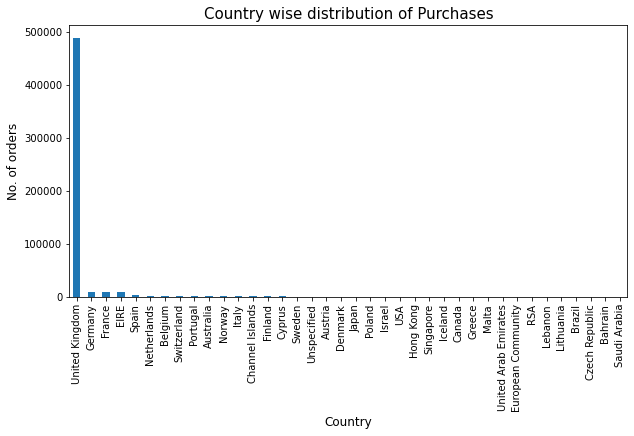

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
p1=pd.value_counts(df['Country']).plot(kind='bar',figsize=(10,5))
p1.set_xlabel('Country',fontsize=12)
p1.set_ylabel('No. of orders',fontsize=12)
p1.set_title('Country wise distribution of Purchases',fontsize=15)
plt.show()


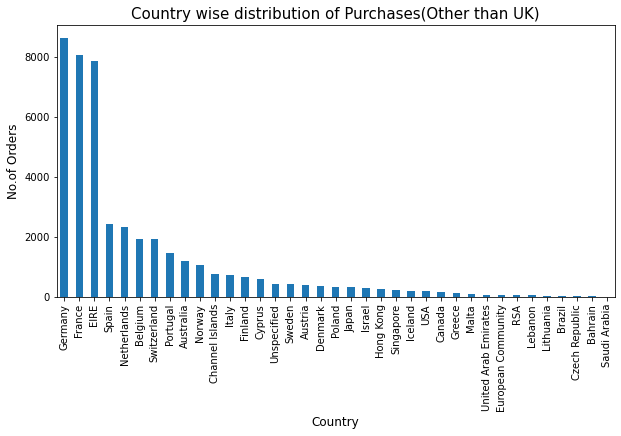

In [252]:
#Countries other than UK

p1=pd.value_counts(df[df['Country'] !='United Kingdom'].Country).plot(kind='bar',figsize=(10,5))
p1.set_xlabel('Country',fontsize=12)
p1.set_ylabel('No.of Orders',fontsize=12)
p1.set_title('Country wise distribution of Purchases(Other than UK)',fontsize=15)
plt.show()
#Germany, France, EIRE significantly more

- Most no. of transactions were from UK
- Other than UK, the countries with highest transactions are Germany, France, EIRE, Spain

#### Distribution of Country-wise revenue generated

Text(0.5, 1.0, 'Country wise distribution of total Revenue')

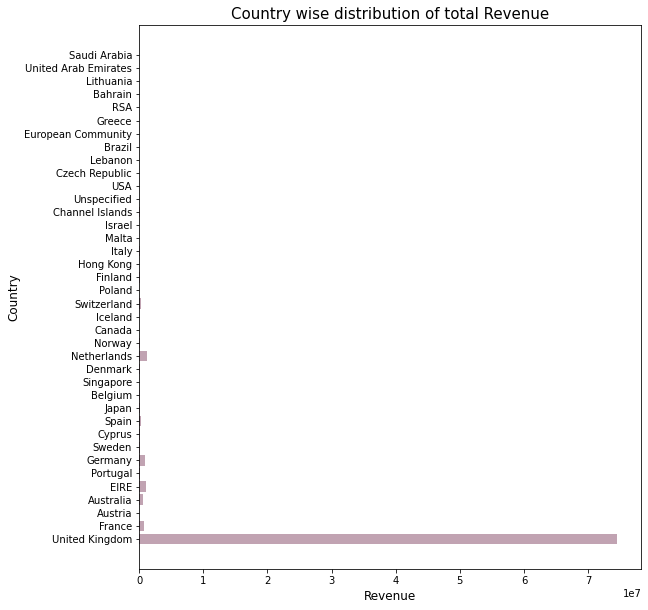

In [83]:
#highest purchasers by cost
country_list= df['Country'].unique()
totalcost_list=[]
for country in country_list:
    sum1=df.loc[df['Country'] == country, 'Total_cost'].sum()
    totalcost_list.append(sum1)

plt.figure(figsize=(9,10))
plt.barh(country_list, totalcost_list, color = (0.6,0.4,0.5,0.6))
#plt.rcParams['figure.figsize'] = (10,1
plt.xlabel('Revenue',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Country wise distribution of total Revenue',fontsize=15)

Text(0.5, 1.0, 'Country wise distribution of total Revenue (Except UK)')

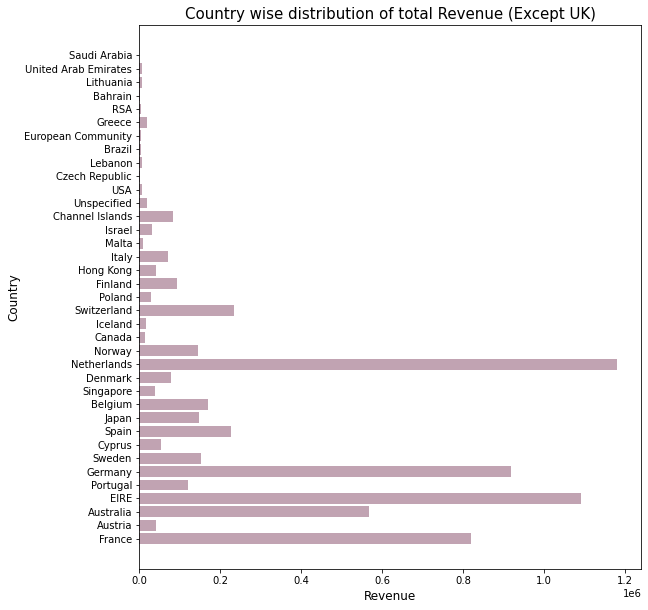

In [84]:
'''
plt.barh(country_list[1:len(country_list)], totalcost_list[1:len(country_list)])
#plt.rcParams['figure.figsize'] = (10,10)

plt.xlabel('Country')
plt.ylabel('Total purchases')
plt.title('Country wise distribution of total purchase cost')
'''
plt.figure(figsize=(9,10))
plt.barh(country_list[1:len(country_list)], totalcost_list[1:len(country_list)], color = (0.6,0.4,0.5,0.6))
#plt.rcParams['figure.figsize'] = (10,1
plt.xlabel('Revenue',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Country wise distribution of total Revenue (Except UK)',fontsize=15)



- Highest contributors to revenue are UK and Netherlands

#### Distribution of purchases over a week

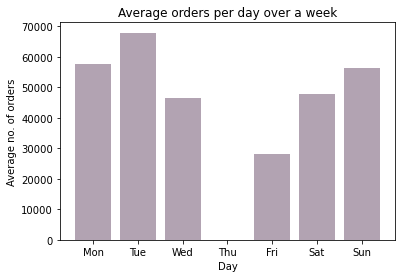

In [85]:
mon= (df[df['Day'] == "Mon"].NumberOfItemsPurchased.sum())/52
tue= (df[df['Day'] == "Tue"].NumberOfItemsPurchased.sum())/52
wed= (df[df['Day'] == "Wed"].NumberOfItemsPurchased.sum())/52
thur= (df[df['Day'] == "Thurs"].NumberOfItemsPurchased.sum())/52
fri= (df[df['Day'] == "Fri"].NumberOfItemsPurchased.sum())/52
sat= (df[df['Day'] == "Sat"].NumberOfItemsPurchased.sum())/52
sun= (df[df['Day'] == "Sun"].NumberOfItemsPurchased.sum())/52
#pd.value_counts(df['Day']).plot.bar()
lis_week=[mon,tue,wed,thur,fri,sat,sun]

bars = ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun')
y_pos = np.arange(len(bars))

plt.bar(y_pos, lis_week, color = (0.5,0.4,0.5,0.6))
 
plt.xticks(y_pos, bars)

plt.title('Average orders per day over a week')
plt.xlabel('Day')
plt.ylabel('Average no. of orders')
 
# Limits for the Y axis

 


plt.show()

Sales dips over weekdays starting from Tuesday(Highest) and slightly increases over the weekend

#### Distribution of free goods sales over a week

[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thu'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sat')]

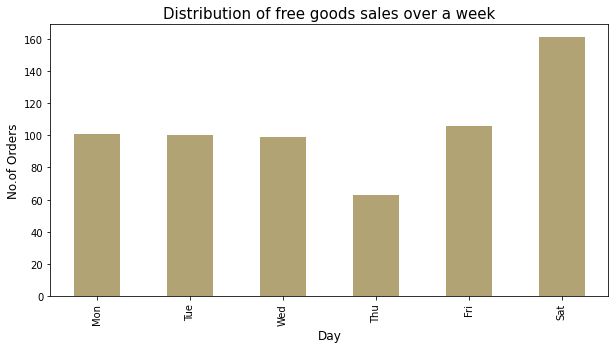

In [86]:
free= df[(df['CostPerItem']== 0)]
#pd.value_counts(free['Day']).plot.bar()
p1=free['Day_num'].value_counts().sort_index(ascending=True).plot(kind='bar',figsize=(10,5),color = (0.5,0.4,0.1,0.6))
p1.set_xlabel('Day',fontsize=12)
p1.set_ylabel('No.of Orders',fontsize=12)
p1.set_title('Distribution of free goods sales over a week',fontsize=15)
p1.set_xticklabels(('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'))

Highest no. of free goods are given on Saturday

#### Monthly Distribution of  sales 

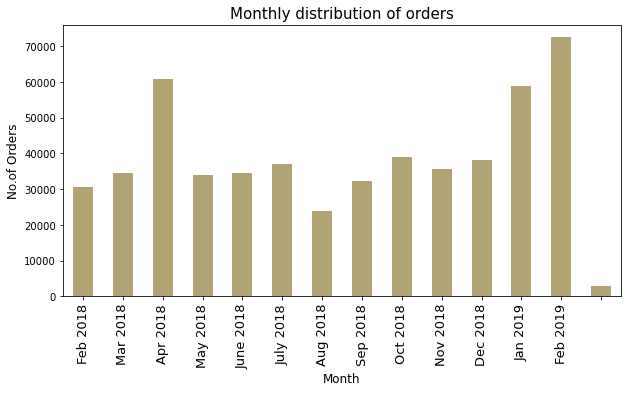

In [87]:
#pl1=df['Month-Year'].value_counts().sort_index(ascending=True).plot.bar()
p1=df['Month-Year'].value_counts().sort_index(ascending=True).plot(kind='bar',figsize=(10,5),color = (0.5,0.4,0.1,0.6))
p1.set_xlabel('Month',fontsize=12)
p1.set_ylabel('No.of Orders',fontsize=12)
p1.set_title('Monthly distribution of orders',fontsize=15)
p1.set_xticklabels(('Feb 2018','Mar 2018','Apr 2018','May 2018','June 2018','July 2018','Aug 2018','Sep 2018','Oct 2018','Nov 2018', 'Dec 2018', 'Jan 2019','Feb 2019'), rotation='vertical', fontsize=13)
plt.show()

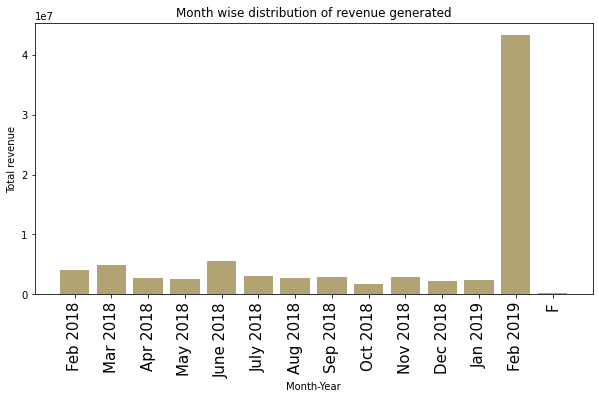

In [88]:
#cost-wise distribution
month_list= df['Month-Year'].unique()
totalcost_list2=[]
for month in month_list:
    sum1=df.loc[df['Month-Year'] == month, 'Total_cost'].sum()
    totalcost_list2.append(sum1)

plt.figure(figsize=(10,5))    
bars = ('Feb 2018','Mar 2018','Apr 2018','May 2018','June 2018','July 2018','Aug 2018','Sep 2018','Oct 2018','Nov 2018', 'Dec 2018', 'Jan 2019','Feb 2019','F')
y_pos = np.arange(len(bars))

plt.bar(y_pos, totalcost_list2 ,color = (0.5,0.4,0.1,0.6))
#plt.rcParams['figure.figsize'] = (10,10)

plt.xlabel('Month-Year')
plt.ylabel('Total revenue')
plt.title('Month wise distribution of revenue generated')    
plt.xticks(y_pos,bars,rotation='vertical', fontsize=15)
#
plt.show()


#### Monthly Distribution of free goods sales 

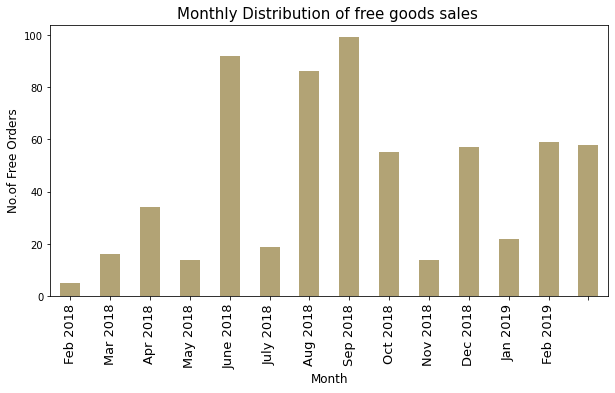

In [89]:

p1=free['Month-Year'].value_counts().sort_index(ascending=True).plot(kind='bar',figsize=(10,5),color = (0.5,0.4,0.1,0.6))
p1.set_xlabel('Month',fontsize=12)
p1.set_ylabel('No.of Free Orders',fontsize=12)
p1.set_title('Monthly Distribution of free goods sales ',fontsize=15)
p1.set_xticklabels(('Feb 2018','Mar 2018','Apr 2018','May 2018','June 2018','July 2018','Aug 2018','Sep 2018','Oct 2018','Nov 2018', 'Dec 2018', 'Jan 2019','Feb 2019'), rotation='vertical', fontsize=13)
plt.show()

#### Trend of no. of orders placed over time

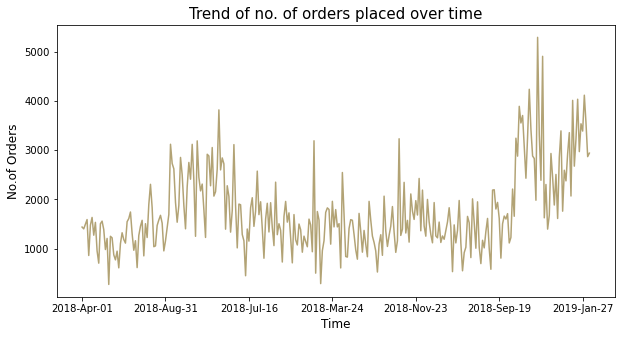

In [90]:
p1=df['Year-Month-Date'].value_counts().sort_index(ascending=True).plot(kind='line',figsize=(10,5),color = (0.5,0.4,0.1,0.6))

#p1=free['Month-Year'].value_counts().sort_index(ascending=True).
p1.set_xlabel('Time',fontsize=12)
p1.set_ylabel('No.of Orders',fontsize=12)
p1.set_title('Trend of no. of orders placed over time',fontsize=15)
#p1.set_xticklabels(('Feb 2018','Mar 2018','Apr 2018','May 2018','June 2018','July 2018','Aug 2018','Sep 2018','Oct 2018','Nov 2018', 'Dec 2018', 'Jan 2019','Feb 2019'), rotation='vertical', fontsize=13)
plt.show()

#### Buying trend each hour (average orders placed each hour)

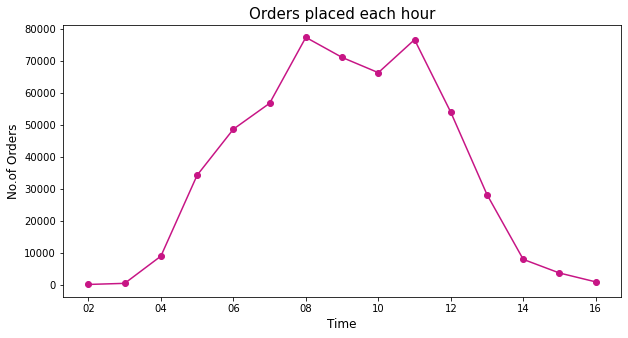

In [91]:
p1=df['Time'].str[0:2].value_counts().sort_index(ascending=True).plot(kind='line',figsize=(10,5),color='mediumvioletred',marker='o')

#p1=free['Month-Year'].value_counts().sort_index(ascending=True).
p1.set_xlabel('Time',fontsize=12)
p1.set_ylabel('No.of Orders',fontsize=12)
p1.set_title('Orders placed each hour',fontsize=15)
#p1.set_xticklabels(('Feb 2018','Mar 2018','Apr 2018','May 2018','June 2018','July 2018','Aug 2018','Sep 2018','Oct 2018','Nov 2018', 'Dec 2018', 'Jan 2019','Feb 2019'), rotation='vertical', fontsize=13)
plt.show()

- Sales peaks from morning 7 am to midday 12:00 pm

Text(0.5, 1.0, 'Trend of orders placed over different times during a day')

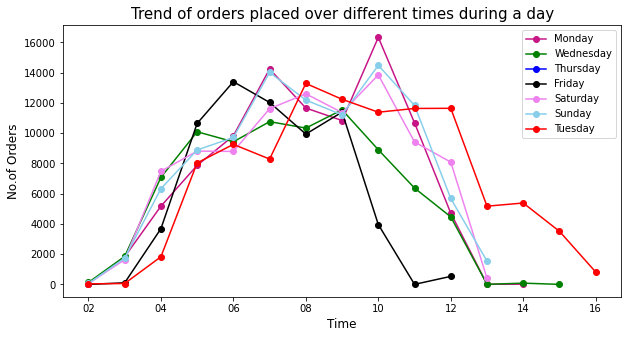

In [92]:
mon= df[df['Day'] == "Mon"].Time.str[0:2].value_counts().sort_index(ascending=True).plot(kind='line',figsize=(10,5),color='mediumvioletred',marker='o',label="Monday")

wed= df[df['Day'] == "Wed"].Time.str[0:2].value_counts().sort_index(ascending=True).plot(kind='line',figsize=(10,5),color='green',marker='o',label= "Wednesday")
thu= df[df['Day'] == "Thu"].Time.str[0:2].value_counts().sort_index(ascending=True).plot(kind='line',figsize=(10,5),color='blue',marker='o',label="Thursday")
fri= df[df['Day'] == "Fri"].Time.str[0:2].value_counts().sort_index(ascending=True).plot(kind='line',figsize=(10,5),color='black',marker='o',label="Friday")
sat= df[df['Day'] == "Sat"].Time.str[0:2].value_counts().sort_index(ascending=True).plot(kind='line',figsize=(10,5),color='violet',marker='o', label="Saturday")
sun= df[df['Day'] == "Sun"].Time.str[0:2].value_counts().sort_index(ascending=True).plot(kind='line',figsize=(10,5),color='skyblue',marker='o',label="Sunday")
tue= df[df['Day'] == "Tue"].Time.str[0:2].value_counts().sort_index(ascending=True).plot(kind='line',figsize=(10,5),color='red',marker='o',label="Tuesday")
#mon= df[df['Day'] == "Mon"].Time.str[0:2].value_counts().sort_index(ascending=True).plot(kind='line',figsize=(10,5),color='mediumvioletred',marker='o')
plt.legend()
plt.xlabel('Time',fontsize=12)
plt.ylabel('No.of Orders',fontsize=12)
plt.title('Trend of orders placed over different times during a day',fontsize=15)


In [ ]:
import numpy as np
date_list= df['Year-Month-Date'].unique()
date_list=np.sort(date_list)
totalcost_list3=[]
for date in date_list:
    sum1=df.loc[df['Year-Month-Date'] == date, 'Total_cost'].sum()
    totalcost_list3.append(sum1)

In [127]:

df['CostPerItem'].value_counts().sort_index(ascending=False)

#sns.boxplot(df[df['CostPerItem'] < 6000].CostPerItem.value_counts())


1696285.44      1
18687.04        1
15265.65        1
11237.00        1
6217.14         1
             ... 
0.12           52
0.10            7
0.09          116
0.06           66
0.01            4
Name: CostPerItem, Length: 1292, dtype: int64

Here we can see that the 5 highest priced items are the ones costing 
 
 22706.12         
 23305.47         
 24614.32         
 53778.60         
 1696285.44

#### Top five items contributing to revenue 


In [130]:
product_list= df['ItemDescription'].unique()
totalcost_list=[]
units=[]
for p in product_list:
    sum1=df.loc[df['ItemDescription'] == p, 'Total_cost'].sum()
    sum2=df.loc[df['ItemDescription'] == p, 'NumberOfItemsPurchased'].sum()
    totalcost_list.append(sum1)
    units.append(sum2)
    print(p)
    

'''
plt.figure(figsize=(9,10))
plt.barh(country_list, totalcost_list, color = (0.6,0.4,0.5,0.6))
#plt.rcParams['figure.figsize'] = (10,1
plt.xlabel('Revenue',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Country wise distribution of total Revenue',fontsize=15)
'''

FAMILY ALBUM WHITE PICTURE FRAME
LONDON BUS COFFEE MUG
SET 12 COLOUR PENCILS DOLLY GIRL 
UNION JACK FLAG LUGGAGE TAG
WASHROOM METAL SIGN
CUT GLASS T-LIGHT HOLDER OCTAGON
NATURAL SLATE CHALKBOARD LARGE 
SKULLS WRITING SET 
MULTI COLOUR SILVER T-LIGHT HOLDER
SET OF 6 RIBBONS PERFECTLY PRETTY  
RED  HARMONICA IN BOX 
WOODEN BOX OF DOMINOES
SET OF 5 MINI GROCERY MAGNETS
LUNCH BAG RED RETROSPOT
FOLDING UMBRELLA CREAM POLKADOT
ALARM CLOCK BAKELIKE GREEN
CARD CIRCUS PARADE
VINTAGE CHRISTMAS TABLECLOTH
SET OF 3 HEART COOKIE CUTTERS
PACK OF 12 SUKI TISSUES 
PINK BABY BUNTING
DISCO BALL CHRISTMAS DECORATION
WOODEN SKITTLES GARDEN SET
ROLL WRAP VINTAGE CHRISTMAS
OWL DOORSTOP
FOOD CONTAINER SET 3 LOVE HEART 
PINK  HEART SHAPE LOVE BUCKET 
FELTCRAFT GIRL NICOLE KIT
LUNCH BOX WITH CUTLERY RETROSPOT 
RETROSPOT GIANT TUBE MATCHES
PANTRY WASHING UP BRUSH
RED RETROSPOT PICNIC BAG
SET OF 4 KNICK KNACK TINS POPPIES
SET/2 RED RETROSPOT TEA TOWELS 
MEMO BOARD RETROSPOT  DESIGN
RED RETROSPOT CHARLOTTE BAG
BL

60 CAKE CASES DOLLY GIRL DESIGN
GLASS JAR PEACOCK BATH SALTS
SET 8 CANDLES VINTAGE DOILY
VINTAGE BILLBOARD LOVE/HATE MUG
SET OF 60 I LOVE LONDON CAKE CASES 
BLUE DINER WALL CLOCK
PINK  HONEYCOMB PAPER FAN
DOORMAT ENGLISH ROSE 
ANTIQUE CREAM CUTLERY CUPBOARD
PARTY CHARMS 50 PIECES
WRAP GREEN PEARS 
SET OF 3 CAKE TINS PANTRY DESIGN 
CREAM SLICE FLANNEL CHOCOLATE SPOT 
ANTIQUE TALL SWIRLGLASS TRINKET POT
SET OF 60 VINTAGE LEAF CAKE CASES 
BABY BOOM RIBBONS 
FRENCH GARDEN SIGN BLUE METAL
CARD BILLBOARD FONT
DINOSAURS  WRITING SET 
CHRISTMAS MUSICAL ZINC STAR
SET/6 PURPLE BUTTERFLY T-LIGHTS
JAZZ HEARTS PURSE NOTEBOOK
RETROSPOT HEART HOT WATER BOTTLE
JAM MAKING SET WITH JARS
PAPER CHAIN KIT 50'S CHRISTMAS 
MORE BUTTER METAL SIGN 
CERAMIC CAKE DESIGN SPOTTED MUG
MONEY BOX HOUSEKEEPING DESIGN
LUNCH BAG VINTAGE DOILY 
MOCK LOBSTER FRIDGE MAGNET
BLUE POLKADOT PLATE 
METAL 4 HOOK HANGER FRENCH CHATEAU
DOORSTOP RETROSPOT HEART
WRAP PINK FAIRY CAKES 
SPOTTY BUNTING
STRAWBERRY LUNCH BOX WITH CUTLERY

SKULLS  STICKERS
TALL ROCOCO CANDLE HOLDER
HOT WATER BOTTLE I AM SO POORLY
REINDEER HEART DECORATION GOLD
CHRISTMAS TREE HANGING GOLD
LUNCH BAG WOODLAND
EDWARDIAN PARASOL RED
YELLOW GIANT GARDEN THERMOMETER
GREEN VINTAGE SPOT BEAKER
12 PENCILS TALL TUBE WOODLAND
SUKI  SHOULDER BAG
RED VINTAGE SPOT BEAKER
PHOTO FRAME 3 CLASSIC HANGING
12 PENCILS SMALL TUBE SKULL
FOLKART STAR CHRISTMAS DECORATIONS
GARLAND WOODEN HAPPY EASTER
TRAVEL SEWING KIT
FOLKART ZINC HEART CHRISTMAS DEC
3 TRADITIONAl BISCUIT CUTTERS  SET
RECYCLED PENCIL WITH RABBIT ERASER
PINK HANGING HEART T-LIGHT HOLDER
CHICK GREY HOT WATER BOTTLE
ALARM CLOCK BAKELIKE IVORY
SLEEPING CAT ERASERS
ASSORTED COLOUR BIRD ORNAMENT
TRADITIONAL CHRISTMAS RIBBONS
MOUSE TOY WITH PINK T-SHIRT
WOODLAND LARGE RED FELT HEART
DARK BIRD HOUSE TREE DECORATION
WRAP WEDDING DAY
SET OF 6 RIBBONS PARTY
DINOSAUR LUNCH BOX WITH CUTLERY
VINTAGE UNION JACK APRON
PINK PAPER PARASOL 
LIPSTICK PEN BABY PINK
HOLIDAY FUN LUDO
WALL ART ANIMALS AND NATURE 
JAM MA

HEART CALCULATOR
LUNCH BAG ALPHABET DESIGN
JUMBO BAG WOODLAND ANIMALS
EDWARDIAN PHOTO FRAME
SMALL RED BABUSHKA NOTEBOOK 
SKULLS GREETING CARD
SET OF 3 BUTTERFLY COOKIE CUTTERS
DOTCOM POSTAGE
CHRISTMAS CARD STACK OF PRESENTS
TREASURE ISLAND BOOK BOX
HANGING METAL HEART LANTERN
RIBBON REEL SOCKS AND MITTENS
CHOCOLATE HOT WATER BOTTLE
POPPY'S PLAYHOUSE LIVINGROOM 
VICTORIAN SEWING BOX SMALL 
ROMANTIC PINKS RIBBONS 
PINK UNION JACK  PASSPORT COVER 
ANTIQUE SILVER TEA GLASS ENGRAVED
MIRROR MOSAIC HURRICANE LAMP 
JUMBO BAG ALPHABET
SET 4 VALENTINE DECOUPAGE HEART BOX
PORCELAIN ROSE SMALL
PEG BAG APPLES DESIGN
SET OF 6 T-LIGHTS SNOWMEN
VINTAGE KID DOLLY CARD 
SET OF 4 NAPKIN CHARMS HEARTS
LUNCH BAG RED VINTAGE DOILY
CARD BIRTHDAY COWBOY
SET 10 LIGHTS NIGHT OWL
PAPER LANTERN 5 POINT STAR MOON 
ROBOT BIRTHDAY CARD
CAKES AND BOWS GIFT  TAPE
BAKING MOULD EASTER EGG WHITE CHOC
BLOSSOM IMAGES GIFT WRAP SET
PLACE SETTING WHITE STAR
HANGING HEART MIRROR DECORATION 
MA CAMPAGNE CUTLERY BOX
CLASSIC GLA

FILIGREE HEART BIRD WHITE 
HERB MARKER BASIL
BLUE CAT BISCUIT BARREL PINK HEART
CANDY SPOT EGG WARMER RABBIT
WHITE TRAVEL ALARM CLOCK
3 HEARTS HANGING DECORATION RUSTIC
CAKE SHOP  STICKER SHEET
ROCKING HORSE GREEN CHRISTMAS 
NOEL GARLAND PAINTED ZINC 
LETTER HOLDER HOME SWEET HOME
CITRONELLA CANDLE GARDEN POT
SMALL HANGING IVORY/RED WOOD BIRD
METAL SIGN CUPCAKE SINGLE HOOK
RED PUDDING SPOON
CHRISTMAS CARD SCREEN PRINT 
MIRRORED DISCO BALL 
VINTAGE BEAD PINK PURSE 
CHRISTMAS GARLAND STARS,TREES
WRAP VINTAGE PETALS  DESIGN
CHRISTMAS TREE DECORATION WITH BELL
PAINTED METAL STAR WITH HOLLY BELLS
LARGE WHITE/PINK ROSE ART FLOWER
GLITTER HANGING BUTTERFLY STRING
SET OF 2 TRAYS HOME SWEET HOME
36 DOILIES VINTAGE CHRISTMAS
ENAMEL MEASURING JUG CREAM
FOOT STOOL HOME SWEET HOME 
CAKE PLATE LOVEBIRD WHITE
GREEN METAL SWINGING BUNNY
BOX OF 6 ASSORTED COLOUR TEASPOONS
DOUGHNUT LIP GLOSS 
15CM CHRISTMAS GLASS BALL 20 LIGHTS
SCANDINAVIAN PAISLEY PICNIC BAG
WHITE JEWELLED HEART DECORATION
LARGE CAMPHO

HAND WARMER RED RETROSPOT
SPACEBOY WALL ART
CARD CAT AND TREE 
BLUE POLKADOT WASHING UP GLOVES
SPACEBOY CHILDRENS CUP
MAGIC GARDEN FELT GARLAND 
12 DAISY PEGS IN WOOD BOX
BIRTHDAY PARTY CORDON BARRIER TAPE
RED RETROSPOT MUG
WOVEN BUBBLE GUM CUSHION COVER
LADS ONLY TISSUE BOX
BLUE GLASS GEMS IN BAG
PACK OF 12 CIRCUS PARADE TISSUES 
COFFEE MUG BLUE PAISLEY DESIGN
CIRCUS PARADE CHILDRENS EGG CUP 
T-LIGHT HOLDER HANGING LOVE BIRD
SET OF 9 BLACK SKULL BALLOONS
SET/10 PINK POLKADOT PARTY CANDLES
Next Day Carriage
IVORY PAPER CUP CAKE CASES 
STORAGE TIN HOME SWEET HOME
HERB MARKER THYME
RED RETROSPOT SUGAR JAM BOWL
PINK FAIRY CAKE CUSHION COVER
WRAP SUKI AND FRIENDS
SET OF 12 T-LIGHTS VINTAGE DOILY
WOODEN OWLS LIGHT GARLAND 
CLASSIC CHROME BICYCLE BELL 
FRENCH STYLE STORAGE JAR BONBONS
FAIRY TALE COTTAGE NIGHT LIGHT
ENAMEL WATERING CAN CREAM
RIBBON REEL HEARTS DESIGN 
OFFICE MUG WARMER CHOC+BLUE
EGG CUP MILKMAID INGRID
VINTAGE GLASS T-LIGHT HOLDER
PARTY PIZZA DISH RED RETROSPOT
PACK OF 12 SPA

VINTAGE CHRISTMAS GIFT BAG LARGE 
SET/6 COLLAGE PAPER CUPS
MAGIC DRAWING SLATE BUNNIES 
FELT FARM ANIMAL WHITE BUNNY 
GLASS HEART T-LIGHT HOLDER 
SET OF 36 DOILIES PANTRY DESIGN
VINTAGE EMBOSSED HEART
S/3 POT POURI CUSHIONS BLUE COLOURS
CREAM WALL PLANTER HEART SHAPED
BLACK CANDELABRA T-LIGHT HOLDER
WHITE LOVEBIRD LANTERN
JARDIN ETCHED GLASS FRUITBOWL
HANGING HEART WITH BELL
WOODLAND PARTY BAG + STICKER SET
HANGING JAM JAR T-LIGHT HOLDERS
ANGEL DECORATION 3 BUTTONS 
RUSTIC MIRROR WITH LACE HEART
SET OF 3 CONEY ISLAND OVAL BOXES
GREEN CAT FLORAL CUSHION COVER 
PARTY INVITES SPACEMAN
CHRISTMAS HANGING SNOWFLAKE
HANGING HEART BASKET
PINK/BLUE DISC/MIRROR STRING
HOME SWEET HOME KEY HOLDER
SET/4 BADGES BALLOON GIRL
SET OF 3 CAKE TINS SKETCHBOOK
GREEN POLKADOT PLATE 
PICTURE FRAME WOOD TRIPLE PORTRAIT
DOILEY STORAGE TIN
CLASSIC BICYCLE CLIPS 
WOODEN REGATTA BUNTING
SET OF 2 TINS JARDIN DE PROVENCE
PASTEL COLOUR HONEYCOMB FAN
DRAWER KNOB VINTAGE GLASS STAR
FOLDING BUTTERFLY MIRROR IVORY 
VINT

RED 3 PIECE RETROSPOT CUTLERY SET
MEDIUM MEDINA STAMPED METAL BOWL 
EASTER DECORATION SITTING BUNNY
POLYESTER FILLER PAD 45x30cm
MINI LIGHTS WOODLAND MUSHROOMS
PACK 6 HEART/ICE-CREAM PATCHES
BLACK GEMSTONE BRACELET
PINK HORSE SOCK PUPPET KIT
3 TIER CAKE TIN RED AND CREAM
CAKE PLATE LOVEBIRD PINK
VINTAGE BILLBOARD DRINK ME MUG
BUTTERFLY HAIR BAND
AMETHYST 3 BEAD DROP EARRINGS
HAPPY EASTER HANGING DECORATION
3 TRADITIONAL COOKIE CUTTERS  SET
PINK JEWELLED PHOTO FRAME 
RED POLKADOT COFFEE  MUG
TURQ STONE/CRYSTAL EARRINGS
EIGHT PIECE CREEPY CRAWLIE SET
SQUARE MINI PORTRAIT FRAME
PERIWINKLE T-LIGHT HOLDER
LOVE GARLAND PAINTED ZINC 
SET/6 PINK BIRD T-LIGHT CANDLES
JAM CLOCK MAGNET
BICYCLE PUNCTURE REPAIR KIT 
CHARLIE + LOLA BISCUITS TINS
ROMANTIC IMAGES NOTEBOOK SET
CAKE STAND LOVEBIRD 2 TIER WHITE
SET OF 6 VINTAGE NOTELETS KIT
VINTAGE DONKEY TAIL GAME 
 TRELLIS COAT RACK
IVORY SHELL HEART EARRINGS
BLUE HOLE PUNCH
EASTER TREE YELLOW BIRDS
5 HOOK HANGER RED MAGIC TOADSTOOL
GLASS SPHERE CANDLE

NUMBER TILE VINTAGE FONT 4
SET OF 6 HALLOWEEN GHOST T-LIGHTS
FELT FARM ANIMAL HEN
COLUMBIAN CANDLE ROUND
ENGLISH ROSE SPIRIT LEVEL 
WALL ART VILLAGE SHOW 
PINK  POLKADOT PLATE 
GARDENIA 3 WICK MORRIS BOXED CANDLE
METAL DECORATION NAUGHTY CHILDREN 
POTTING SHED SOW 'N' GROW SET
DOORSTOP FOOTBALL DESIGN
TUMBLER NEW ENGLAND
LILAC DIAMANTE PEN IN GIFT BOX
FUSCHIA RETRO BAR STOOL
DECORATIVE PLANT POT WITH FRIEZE
BLACK SMALL GLASS CAKE STAND
DRAWER KNOB VINTAGE GLASS BALL
METAL RABBIT LADDER EASTER 
PHOTO FRAME LINEN AND LACE LARGE
S/4 BLACK MINI ROSE CANDLE IN BOWL
PACK 20 ENGLISH ROSE PAPER NAPKINS
PINK AND BLACK STRING CURTAIN
VANILLA SCENT CANDLE JEWELLED BOX
SET OF 4 CAROUSEL PLACEMATS 
BASKET OF FLOWERS SEWING KIT
SILVER T-LIGHT SETTING
RIBBONS PURSE 
BLUE NEW BAROQUE CANDLESTICK CANDLE
PURPLE GEMSTONE BRACELET
PSYCHEDELIC TILE COASTER
GREEN JUICY FRUIT PHOTO FRAME
PICNIC BOXES SET OF 3 RETROSPOT 
RED WHITE SCARF  HOT WATER BOTTLE
TROPICAL PASSPORT COVER 
TRAVEL CARD WALLET VINTAGE ROS

DAISY GARDEN MARKER
BLUE SCOTTIE DOG W FLOWER PATTERN
GOLD WASHBAG
PAIR BUTTERFLY HAIR CLIPS
PAPERWEIGHT SAVE THE PLANET
SET OF 3 COLOURED  FLYING DUCKS
LARGE STRIPES CHOCOLATE GIFT BAG
LOVE SEAT ANTIQUE WHITE METAL
SILVER BLACK ORBIT DROP EARRINGS
JUNGLE POPSICLES ICE LOLLY HOLDERS
WISE MAN STAR SHAPE EGG PAN
LAUREL HEART ANTIQUE GOLD
TROPICAL HOLIDAY PURSE 
GLITTER HEART DECORATION
WALL ART THE MAGIC FOREST 
SPRIG LAVENDER ARTIFICIAL FLOWER
VINTAGE LEAF CHOPPING BOARD  
WRAP RED DOILEY
BLUE KNITTED EGG COSY
PIECE OF CAMO STATIONERY SET
RED RETROSPOT WASHBAG
FELT EGG COSY CHICKEN
PINK POLKADOT PLATE 
MEDINA STAMPED METAL STOOL
CHALKBOARD KITCHEN ORGANISER
CAMOUFLAGE EAR MUFF HEADPHONES
WOODLAND STORAGE BOX LARGE 
SET/6 BLACK BIRD T-LIGHT CANDLES
PAISLEY PARK CARD
FRENCH ENAMEL POT W LID
SILVER M.O.P ORBIT BRACELET
T-LIGHT HOLDER SWEETHEART HANGING
PEARLISED IVORY HEART SMALL 
BLUE CHENILLE SHAGGY CUSHION COVER 
SMALL STRIPES CHOCOLATE GIFT BAG 
ASSORTED LAQUERED INCENSE HOLDERS
POTTIN

GOLD FISHING GNOME
HAND OPEN SHAPE DECO.WHITE
PINK KNITTED EGG COSY
PINK OVAL SHAPE TRINKET BOX
ROCOCO WALL MIROR
PINK CHICK EGG WARMER + EGG CUP
FOLDING UMBRELLA BLACKBLUE POLKADOT
PAPER LANTERN 9 POINT SNOW STAR 
MIRRORED WALL ART SPLODGES
4 PINK DINNER CANDLE SILVER FLOCK
ACRYLIC HANGING JEWEL,BLUE
BLUE PATCH PURSE PINK HEART
BATHROOM SCALES RUBBER DUCKS
BIRTHDAY BANQUET GIFT WRAP
CHERRY BLOSSOM PURSE
TUB 24 PINK FLOWER PEGS
MIRRORED WALL ART GENTS
RED TEA TOWEL CLASSIC DESIGN
NEW BAROQUE SMALL NECKLACE BLACK
BLACK STITCHED WALL CLOCK
TUMBLER BAROQUE
CRYSTAL SEA HORSE PHONE CHARM
PEACE SMALL WOOD LETTERS
MODERN VINTAGE COTTON SHOPPING BAG
PINK HEART SHAPE PHOTO FRAME
SILVER LARIAT 40CM
BLUE BLOSSOM HAIR CLIP
ANT COPPER TURQ BOUDICCA BRACELET
WAY OUT METAL SIGN 
ASSTD RASTA KEY-CHAINS
BLUE BIRDHOUSE DECORATION
WHITE GLASS CHUNKY CHARM BRACELET
SMALL SINGLE FLAME CANDLE HOLDER
BAROQUE BUTTERFLY EARRINGS BLACK
NEW BAROQUE JEWELLERY BOX 
PINK HEARTS LIGHT CHAIN 
BLUE GEISHA GIRL 
WRAP M

DAISY HAIR COMB
ETCHED GLASS STAR TREE DECORATION
AQUA BERTIE GLASS BEAD BAG CHARM
ACRYLIC HANGING JEWEL,PINK
BLACK GRAND BAROQUE PHOTO FRAME
DECROTIVEVINTAGE COFFEE GRINDER BOX
TUMBLER, BAROQUE
PAIR PADDED HANGERS PINK CHECK
GREEN GLASS TASSLE BAG CHARM
CUT GLASS HEXAGON T-LIGHT HOLDER
PINK RETRO BIG FLOWER BAG
BLACK SQUARE TABLE CLOCK
METAL HERB GERDEN CONTAINER
VINTAGE BEAD PINK SHADE 
GOLD/AMBER DROP EARRINGS W LEAF
CITRUS GARLAND FELT FLOWERS 
SET 10 CARDS OUT OF ORDER 17216
WALL ART VINTAGE HEART
LETTER "T" BLING KEY RING
FLOWER FAIRY,5 SUMMER B'DRAW LINERS
S/2 ZINC HEART DESIGN PLANTERS
BLUE DISCO HANDBAG
PINK SQUARE TABLE CLOCK
OYSTER TRINKET BOX
BOTANICAL LILY GIFT WRAP
PAPER BUNTING PAISLEY PARK
PINK VINTAGE VICTORIAN EARRINGS
RETRO PILL BOX KEY CHAIN,THE KING
GREEN SQUARE COMPACT MIRROR
75 BLACK PETIT FOUR CASES
BLACK CHERRY LIGHTS
DROP DIAMANTE EARRINGS GREEN
RUSTIC STRAWBERRY JAM POT SMALL
FIRST CLASS HOLIDAY PURSE 
CROCHET BEAR RED/BLUE  KEYRING
ASSORTED FARMYARD ANIMALS 

STRING OF 8 BUTTERFLIES,PINK
MOROCCAN BEATEN METAL DISH
BEACH HUT DESIGN BLACKBOARD
GOLD TEDDY BEAR
SET 10 CARDS POINSETTIA 17093
HEN HOUSE WITH CHICK STANDING
FIRST CLASS PASSPORT COVER 
FOLDING MIRROR RED  
PINK BOUDICCA LARGE BRACELET
WRAP A PRETTY THANK YOU
MEDIUM PINK BUDDHA HEAD 
AMETHYST GLASS/SHELL/PEARL NECKLACE
PINK ROSEBUD PEARL BRACELET
PASTEL BLUE PHOTO ALBUM 
ANTIQUE IVORY WIRE BOWL SMALL
TUSCAN VILLA BIRD FEEDER
MIDNIGHT BLUE CRYSTAL DROP EARRINGS
*Boombox Ipod Classic
YELLOW/PINK CERAMIC CANDLE HOLDER
WHITE  ROSEBUD PEARL BRACELET
ROUND CACTUS CANDLE
WHITE VINTAGE CRYSTAL EARRINGS
LEAVES MAGNETIC  SHOPPING LIST
PINK B'FLY C/COVER W BOBBLES
Dotcomgiftshop Gift Voucher £10.00
WHITE HYDRANGEA ART FLOWER
VINTAGE KITCHEN PRINT SEAFOOD
GINGHAM OVEN GLOVE RED HEART 
ROSE COLOUR PAIR HEART HAIR SLIDES
AMBER CRYSTAL DROP EARRINGS
BLACK MEDIUM GLASS CAKE STAND
RUSTIC STRAWBERRY JAMPOT SMALL
RESIN BRACELET W PASTEL BEADS
PINK MURANO TWIST NECKLACE
RUSTIC STRAWBERRY JAMPOT LARGE 
D

GOLD COSMETICS BAG WITH BUTTERFLY
SET 10 CARDS DECK THE HALLS 16960
YELLOW POT PLANT CANDLE
MOP PENDANT SHELL NECKLACE
5 STRAND GLASS NECKLACE BLACK
PINK DOG CANNISTER
3 BLACK CATS W HEARTS BLANK CARD
PURPLE FOXGLOVE ARTIIFCIAL FLOWER
PALE PINK/AMETHYST STONE NECKLACE
PINK FLOCK PHOTO FRAME 
WALL ART,ONLY ONE PERSON 
ANTIQUE RASPBERRY FLOWER EARRINGS
PAPER LANTERN 9 POINT HOLLY STAR 40
GARLAND, MAGIC GARDEN 1.8M
CHUNKY CRACKED GLAZE NECKLACE IVORY
AMBER FINE BEAD NECKLACE W TASSEL
WHITE SILVER NECKLACE SHELL GLASS
TUSCAN VILLA DOVECOTE
SILVER/NAT SHELL NECKLACE W PENDANT
SET 10 MINICARDS CUTE SNOWMAN 17071
SET 6 CARDS SPARKLY REINDEER 17262
DIAMANTE NECKLACE
GOLD FLOWER CUSHION COVER 
PINK MURANO TWIST BRACELET
PINK COMBO MINI CRYSTALS NECKLACE
TURQUOISE CRYSTAL+GLASS BRACELET
MONTANA DIAMOND CLUSTER EARRINGS
BLUE SHARK HELICOPTER
GREEN PENDANT SHELL NECKLACE
NEW BAROQUE B'FLY NECKLACE MONTANA
BLACK GLASS/SHELL/PEARL NECKLACE
BLACK CHRISTMAS FLOCK DROPLET 
ARMY CAMO BOOKCOVER TAPE
SILV

"\nplt.figure(figsize=(9,10))\nplt.barh(country_list, totalcost_list, color = (0.6,0.4,0.5,0.6))\n#plt.rcParams['figure.figsize'] = (10,1\nplt.xlabel('Revenue',fontsize=12)\nplt.ylabel('Country',fontsize=12)\nplt.title('Country wise distribution of total Revenue',fontsize=15)\n"

In [134]:
item_revenue = pd.DataFrame(list(zip(product_list, totalcost_list,units)), 
               columns =['Name', 'Total_cost','NumberOfItemsPurchased'])

revenue_item=item_revenue.sort_values(by=['Total_cost'], ascending=False)
revenue_item.head()


,Name,Total_cost,NumberOfItemsPurchased
2606,RETROSPOT LAMP,40725107.88,990.0
894,DOTCOM POSTAGE,853879.95,2118.0
156,REGENCY CAKESTAND 3 TIER,721317.54,41553.0
3961,"PAPER CRAFT , LITTLE BIRDIE",699796.80,242985.0
84,WHITE HANGING HEART T-LIGHT HOLDER,440320.92,113616.0


#### Top five items in terms of no. of units sold (Most popular)


In [135]:
units_sold=item_revenue.sort_values(by=['NumberOfItemsPurchased'], ascending=False)
units_sold.head()

,Name,Total_cost,NumberOfItemsPurchased
3961,"PAPER CRAFT , LITTLE BIRDIE",699796.80,242985.0
1303,MEDIUM CERAMIC TOP STORAGE JAR,339366.72,234099.0
420,WORLD WAR 2 GLIDERS ASSTD DESIGNS,58036.53,164853.0
136,JUMBO BAG RED RETROSPOT,390968.88,145113.0
84,WHITE HANGING HEART T-LIGHT HOLDER,440320.92,113616.0


#### Top 5 customers in terms of revenue

In [138]:
user_list= df['UserId'].unique()
totalcost_list1=[]
units1=[]

for p in user_list:
    s1=df.loc[df['UserId'] == p, 'Total_cost'].sum()
    s2=df.loc[df['UserId'] == p, 'NumberOfItemsPurchased'].sum()
    totalcost_list1.append(s1)
    units1.append(s2)
    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074


3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742


In [139]:
user_revenue = pd.DataFrame(list(zip(user_list, totalcost_list1,units1)), 
               columns =['UserId', 'Total_cost','NumberOfItemsPurchased'])

rev_user=user_revenue.sort_values(by=['Total_cost'], ascending=False)
rev_user.head()

,UserId,Total_cost,NumberOfItemsPurchased
4277,288687,40710850.56,24.0
4,-1,7271186.52,1261095.0
259,307566,1163215.47,590745.0
597,380142,1076194.08,192372.0
256,366450,805910.52,209919.0


#### Top 5 customers in terms of no. of items purchased

In [143]:
rev_user=user_revenue.sort_values(by=['NumberOfItemsPurchased'], ascending=False)
rev_user.head()

,UserId,Total_cost,NumberOfItemsPurchased
4,-1,7271186.52,1261095.0
259,307566,1163215.47,590745.0
4204,345366,699808.83,242991.0
71,313131,596207.58,240720.0
338,260715,518341.62,232122.0


In [253]:
rev_user.describe()

,UserId,Total_cost,NumberOfItemsPurchased
count,4339.000000,4.339000e+03,4.339000e+03
mean,321234.516939,1.955598e+04,3.852570e+03
std,36481.385354,6.287496e+05,2.435846e+04
min,-1.000000,1.557000e+01,3.000000e+00
25%,290062.500000,1.272840e+03,4.770000e+02
50%,321279.000000,2.785680e+03,1.134000e+03
75%,352348.500000,6.887880e+03,2.971500e+03
max,384027.000000,4.071085e+07,1.261095e+06


### Conclusion

#### After data cleaning and performing EDA, the following can be concluded:
- Most no. of transactions were from UK
- Other than UK, the countries with highest transactions are Germany, France, EIRE, Spain
- Highest contributors to revenue are UK and Netherlands
- Sales dips over weekdays starting from Tuesday(Highest) and slightly increases over the weekend
- Highest no. of free goods are given on Saturday
- Sales peaks from morning 7 am to midday 12:00 pm
- Top item contributing to revenue is RETROSPOT LAMP 
- Most popular item (most no. of units sold) is PAPER CRAFT , LITTLE BIRDIE
- Highest was spent by customer with UserId 288687
- Highest no. of units purchased were by unregistered users

### Recommender System

In [269]:
piv=df.pivot_table(index='ItemCode',columns='UserId',values='NumberOfItemsPurchased').fillna(0)
piv

UserId,-1,259266,259287,259308,259329,259350,259392,259413,259434,259455,...,383733,383754,383796,383817,383838,383880,383901,383922,383943,384027
ItemCode,,,,,,,,,,,,,,,,,,,,,
42,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1449,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1470,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894389,5.419355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1894410,3.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1894431,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [270]:
from scipy.sparse import csr_matrix

sp_mat = csr_matrix(piv.values)

from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(sp_mat)

NearestNeighbors(algorithm='brute', metric='cosine')

In [271]:
def get_neighbours(itemcode):
    #distances=[0,0,0]
    #indices =[0,0,0]
    distances, indices = model.kneighbors(piv.loc[itemcode].values.reshape(1, -1), n_neighbors = 3)
    return distances, indices
    

In [272]:
##########################################
df_recommend=pd.DataFrame(columns=['ItemCode','Recommended ItemCode 1','Recommended ItemCode 2'])
df_recommend['ItemCode']= piv.index

count=0
for i in range(piv.shape[0]):
    
    distances, indices = get_neighbours(piv.index[i])
    df_recommend['ItemCode'][i] = piv.index[i]
    df_recommend['Recommended ItemCode 1'][i] = piv.index[indices.flatten()[1]]
    df_recommend['Recommended ItemCode 2'][i]= piv.index[indices.flatten()[2]]
    


In [275]:
df_recommend.head(20)
df_recommend.to_csv("Arundhati_IITM_2.csv")

,ItemCode,Recommended ItemCode 1,Recommended ItemCode 2
0,42,1892478,1893549
1,63,84,1449
2,84,84,1449
3,1449,84,1449
4,1470,84,1449
5,1596,84,1449
6,2310,84,1449
7,2520,84,1449
8,2730,84,1449
9,2940,84,1449
